<a href="https://colab.research.google.com/github/mayssajr/TrustCam/blob/main/IntrusionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q ultralytics opencv-python matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2, os, matplotlib.pyplot as plt, seaborn as sns

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!curl -L https://github.com/VisDrone/VisDrone-Dataset/releases/download/2019-DET/VisDrone2019-DET-train.zip -o visdrone_train.zip
!unzip -q visdrone_train.zip -d ./datasets/

!curl -L https://github.com/VisDrone/VisDrone-Dataset/releases/download/2019-DET/VisDrone2019-DET-val.zip -o visdrone_val.zip
!unzip -q visdrone_val.zip -d ./datasets/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100     9  100     9    0     0     25      0 --:--:-- --:--:-- --:--:--    26
[visdrone_train.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of visdrone_train.zip or
        visdrone_train.zip.zip, and cannot find visdrone_train.zip.ZIP, period.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100     9  100     9    0     0     25      0 --:--:-- --:--:-- --:--:--    25
[visdrone_val.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipf

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
model.train(
    data="https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/datasets/VisDrone.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0  # 0 = GPU
)

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/datasets/VisDrone.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aca4ea98320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
results = model.val()

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2122.1±661.6 MB/s, size: 126.7 KB)
val: Scanning /content/datasets/VisDrone/labels/val.cache... 548 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 548/548 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 5.0it/s 6.9s
                   all        548      38759      0.419      0.322      0.319      0.184
            pedestrian        520       8844      0.425      0.334      0.325      0.137
                people        482       5125      0.478       0.22       0.26     0.0936
               bicycle        364       1287      0.206     0.0925     0.0675     0.0245
                   car        515      14064      0.611      0.736      0.739      0.501
                   van      

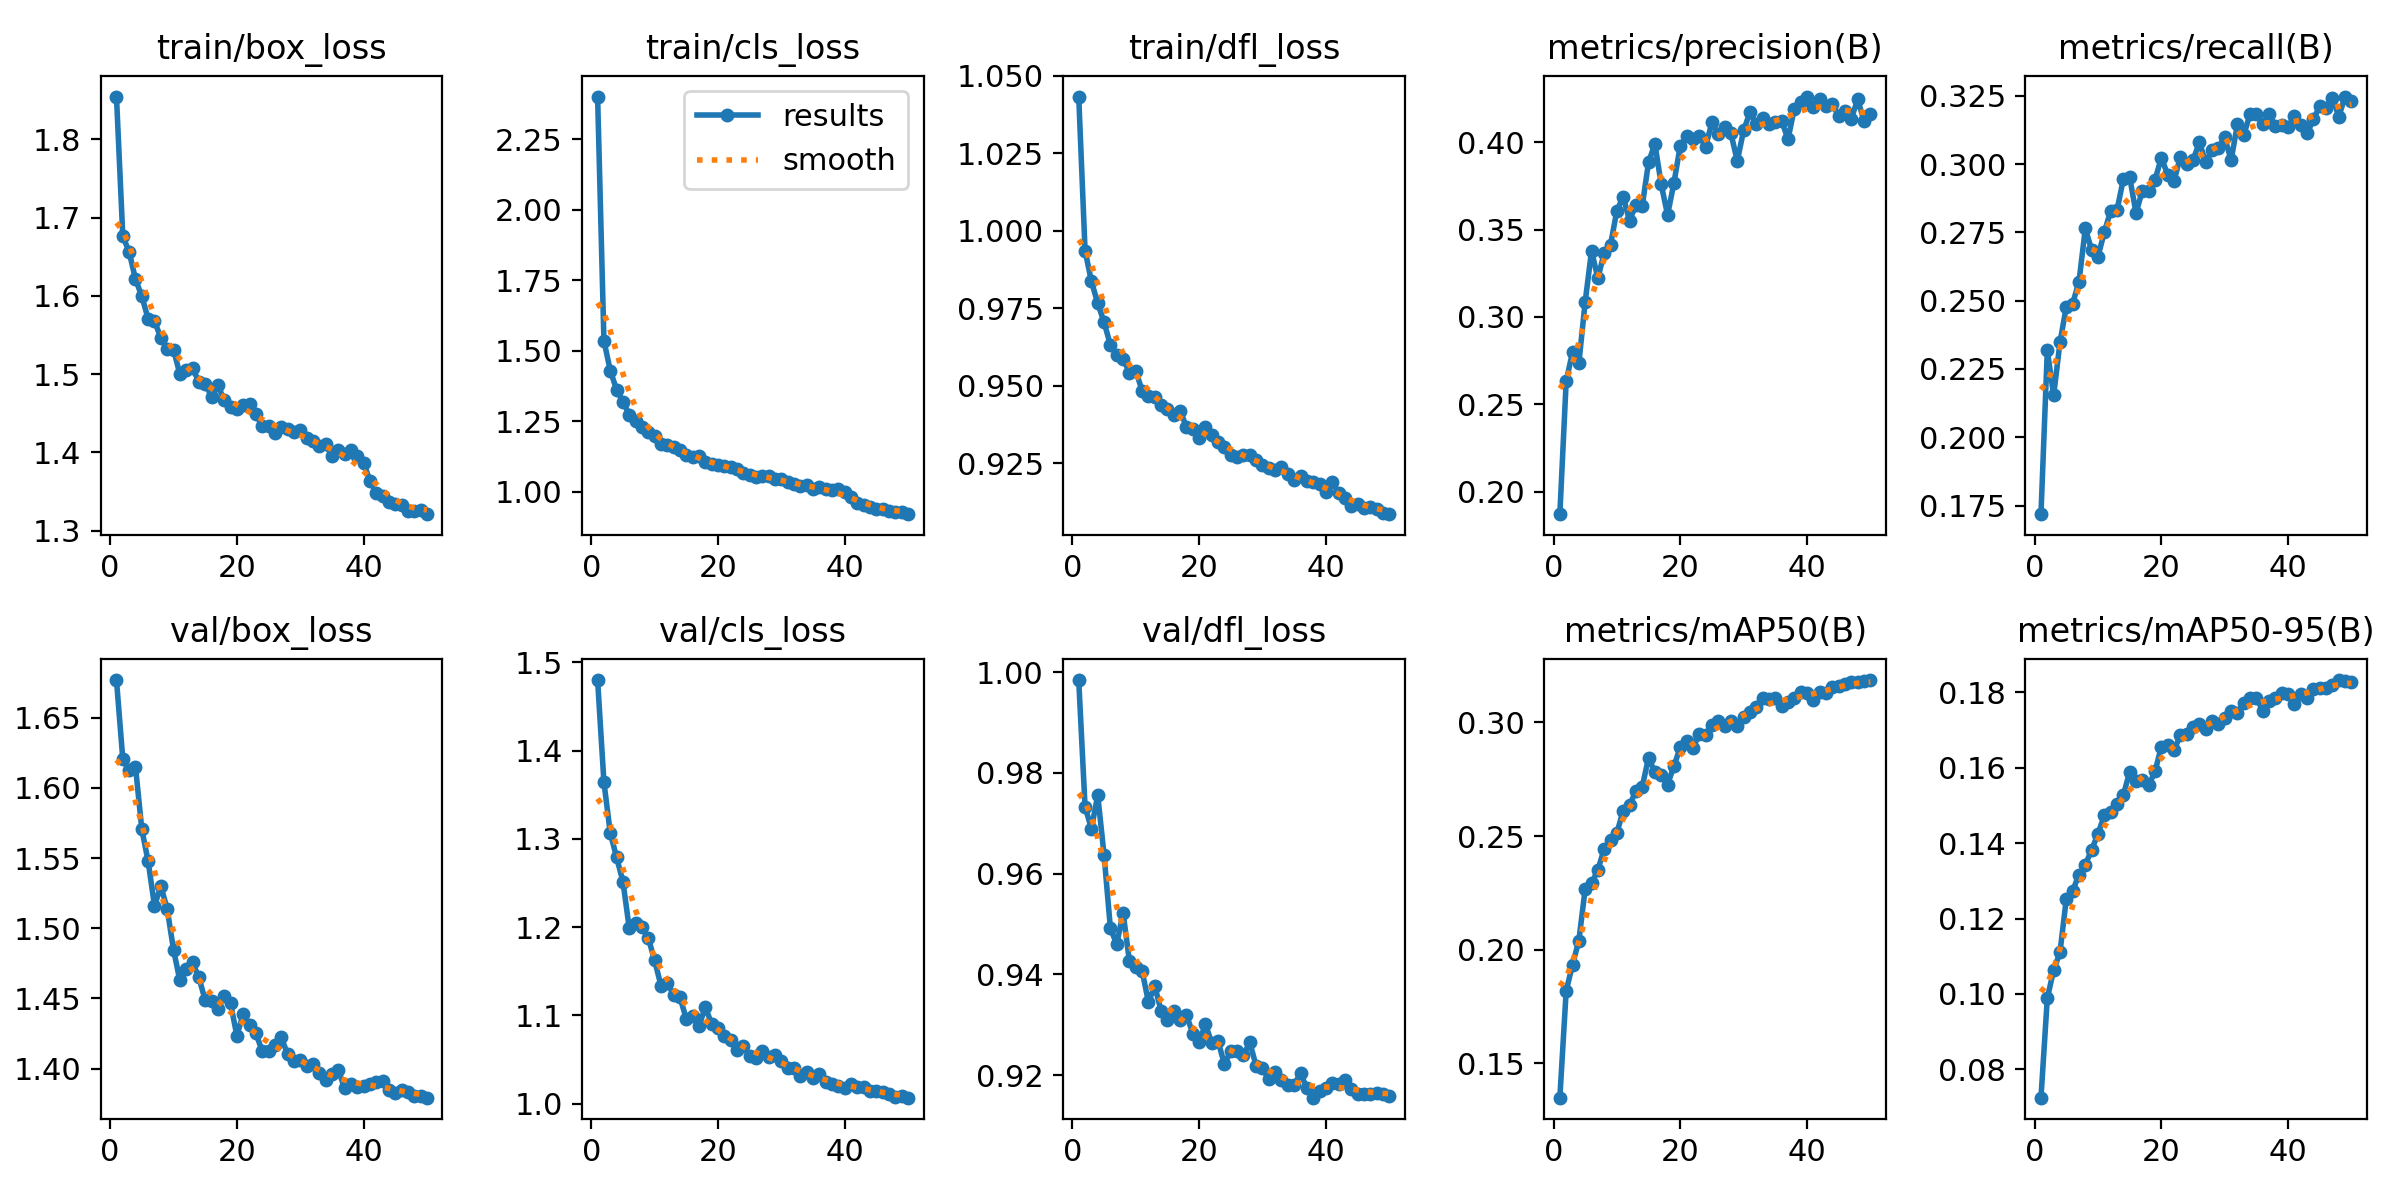

In [ ]:
from IPython.display import Image
Image(filename="runs/detect/train/results.png")

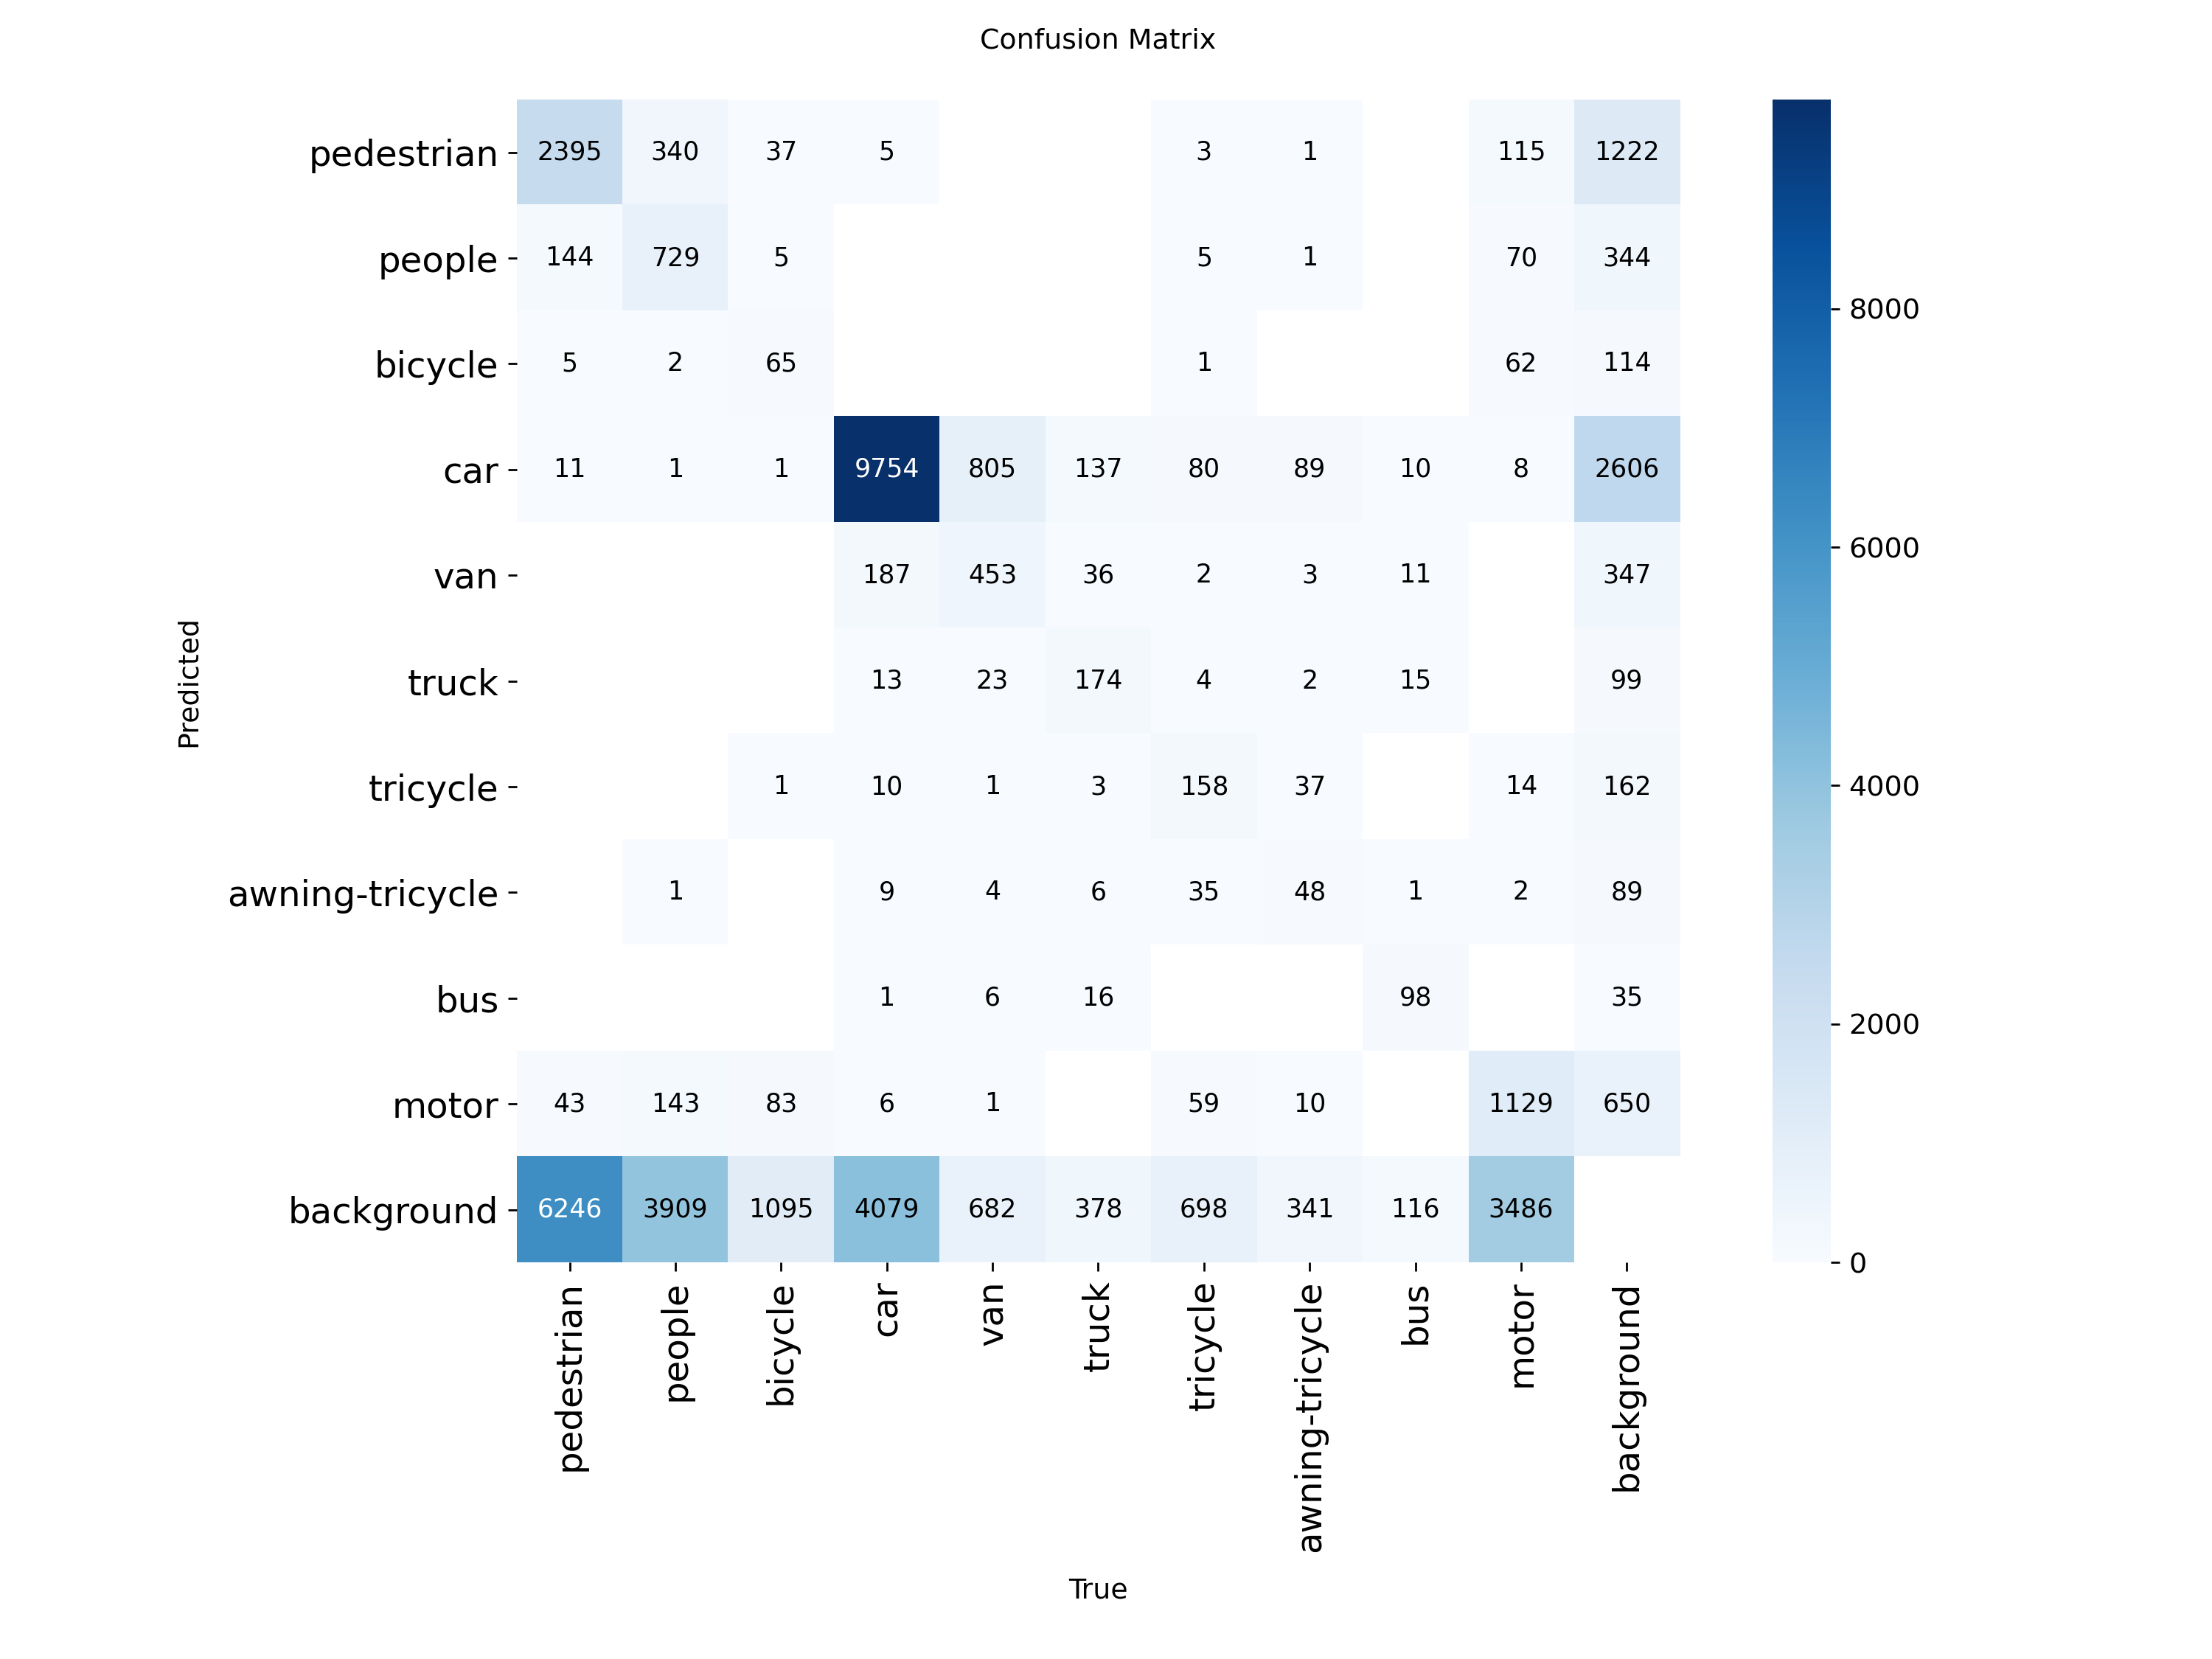

In [ ]:
Image(filename="runs/detect/train/confusion_matrix.png")

In [ ]:
model.export(format="tflite", int8=True, nms=True)

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.9 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 13.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_ima

'/content/runs/detect/train/weights/best_saved_model/best_int8.tflite'